# Cross model evaluation
### In this note book, I will compare the MSE produced by different models

In [12]:
import numpy as np
import pandas as pd
from utils import *
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [14]:
ada_tree = pd.read_csv("ada_tree.csv")
tree_norm = pd.read_csv('tree_norm.csv')
tree_one_hot = pd.read_csv('tree_one_hot.csv')
reg_result = pd.read_csv('reg_result.csv')

In [24]:
reg_use = reg_result.loc[reg_result['model'] != 'Linear Regression']
reg_use['cutoff'] = pd.to_datetime(reg_use['cutoff'])
reg_use.head()

/var/folders/lc/lwj679010v9dq_hdbg2xjrbm0000gn/T/ipykernel_56524/608443437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_use['cutoff'] = pd.to_datetime(reg_use['cutoff'])


,Unnamed: 0,cutoff,model,MSE
53,0,2013-05-31,Ridge Regression,278062.900925
54,1,2013-06-30,Ridge Regression,265776.719225
55,2,2016-04-15,Ridge Regression,517490.898927
56,3,2014-08-24,Ridge Regression,744423.329141
57,4,2016-08-13,Ridge Regression,810487.700692


In [16]:
ada_tree.head()

,Unnamed: 0,cutoff,model,MSE
0,0,2013-12-27,adaboost_tree,7.031704e+05
1,1,2015-06-20,adaboost_tree,6.993145e+05
2,2,2015-09-18,adaboost_tree,1.018193e+06
3,3,2017-04-10,adaboost_tree,9.957335e+05
4,4,2016-07-14,adaboost_tree,9.507572e+05


In [17]:
tree_norm.head()

,Unnamed: 0,cutoff,model,MSE
0,0,2014-08-24,Decision Tree norm data,1.834559e+06
1,1,2014-03-27,Decision Tree norm data,1.095552e+06
2,2,2014-05-26,Decision Tree norm data,1.855944e+06
3,3,2015-10-18,Decision Tree norm data,2.033912e+06
4,4,2015-08-19,Decision Tree norm data,1.660681e+06


In [19]:
tree_one_hot['model'] = 'Decision Tree One Hot'
tree_one_hot.head()

,Unnamed: 0,cutoff,model,MSE
0,0,2014-08-24,Decision Tree One Hot,1.166631e+06
1,1,2014-03-27,Decision Tree One Hot,8.182061e+05
2,2,2014-05-26,Decision Tree One Hot,9.004673e+05
3,3,2015-10-18,Decision Tree One Hot,1.134668e+06
4,4,2015-08-19,Decision Tree One Hot,1.071753e+06


In [22]:
draw = pd.concat([reg_use, ada_tree, tree_norm, tree_one_hot])
draw['cutoff'] = pd.to_datetime(draw['cutoff'])
draw.head()

,Unnamed: 0,cutoff,model,MSE
53,0,2013-05-31,Ridge Regression,278062.900925
54,1,2013-06-30,Ridge Regression,265776.719225
55,2,2016-04-15,Ridge Regression,517490.898927
56,3,2014-08-24,Ridge Regression,744423.329141
57,4,2016-08-13,Ridge Regression,810487.700692


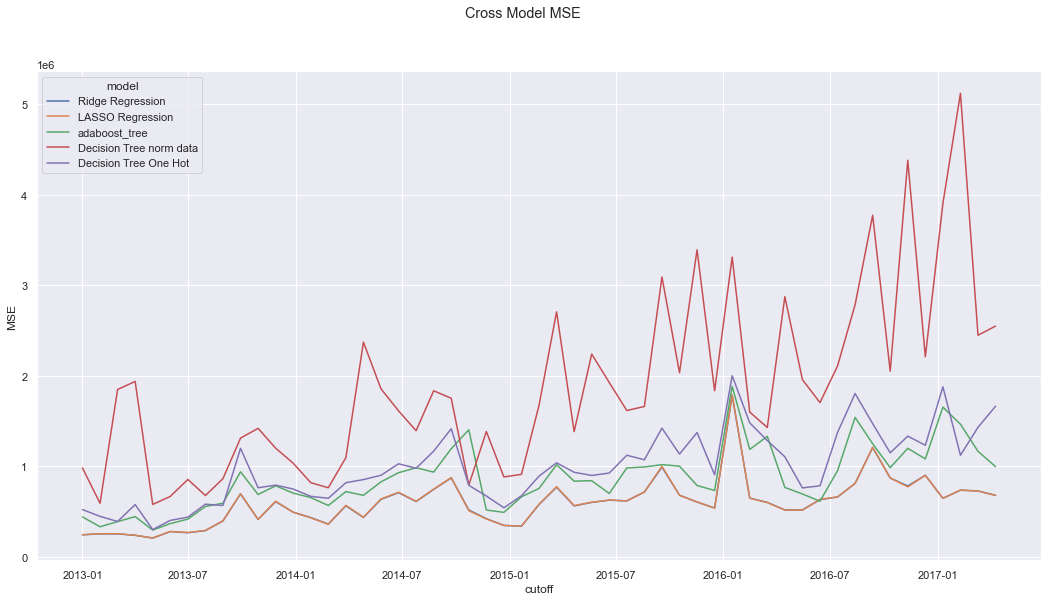

In [30]:
# ploting result
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(18,9))
fig.suptitle('Cross Model MSE')

sns.lineplot(ax = axes, data = draw.reset_index(), x = 'cutoff', y = 'MSE', hue = 'model')



#plt.savefig('cross_model1.jpg')

In [28]:
draw2 = draw.loc[draw['model'] != 'Decision Tree norm data']

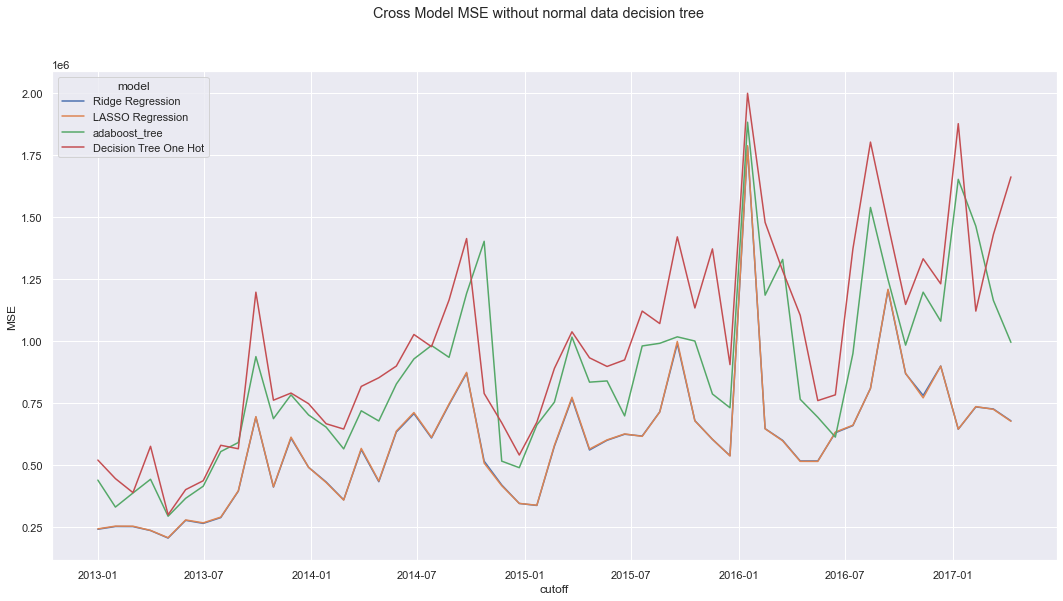

In [31]:
# ploting result
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(18,9))
fig.suptitle('Cross Model MSE without normal data decision tree')

sns.lineplot(ax = axes, data = draw2.reset_index(), x = 'cutoff', y = 'MSE', hue = 'model')


#plt.savefig('cross_model2.jpg')